### Evaluación de métricas y variables de los modelos lineales

In [65]:
import sys

sys.path.append("../../") # go to parent dir

In [66]:
from modelos import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [67]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [68]:
runs = pd.read_csv('runs/runs-lineal.csv')
runs.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,C,alpha,l1_ratio,loss,max_iter,random_state,selection,solver,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-25 21:48:59,2.2s,e2d9f55352214a68bfeb2ebf4666957d,manual-selection-elastic_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.470895,0.468566,777,2.391322,0.347457,0.275301,0.453012,Modelo elastic net
1,2024-04-25 21:45:29,2.1s,49edc7bd221542e49a363d3e509eb771,elastic_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.468650,0.466201,777,2.350608,0.348281,0.279454,0.453078,Modelo elastic net
2,2024-04-25 21:45:24,2.0s,bb9ddbebae1148d8b65a71b3dd5f0331,elastic_grid_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.00,NaN,500.0,777,NaN,NaN,0.468081,0.465297,777,2.345476,0.348467,0.278525,0.453621,Modelo elastic net
3,2024-04-25 21:48:55,1.9s,ffc8f5b34d184e3c9523b41315c434dc,manual-selection-elastic_grid_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.00,NaN,500.0,777,NaN,NaN,0.470368,0.467701,777,2.382992,0.347718,0.276743,0.453662,Modelo elastic net
4,2024-04-25 21:45:37,1.9s,29635759a12a493690bab29c7ef71f11,escalado-elastic_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.468541,0.466025,777,2.401625,0.348845,0.279977,0.454201,Modelo elastic net


### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

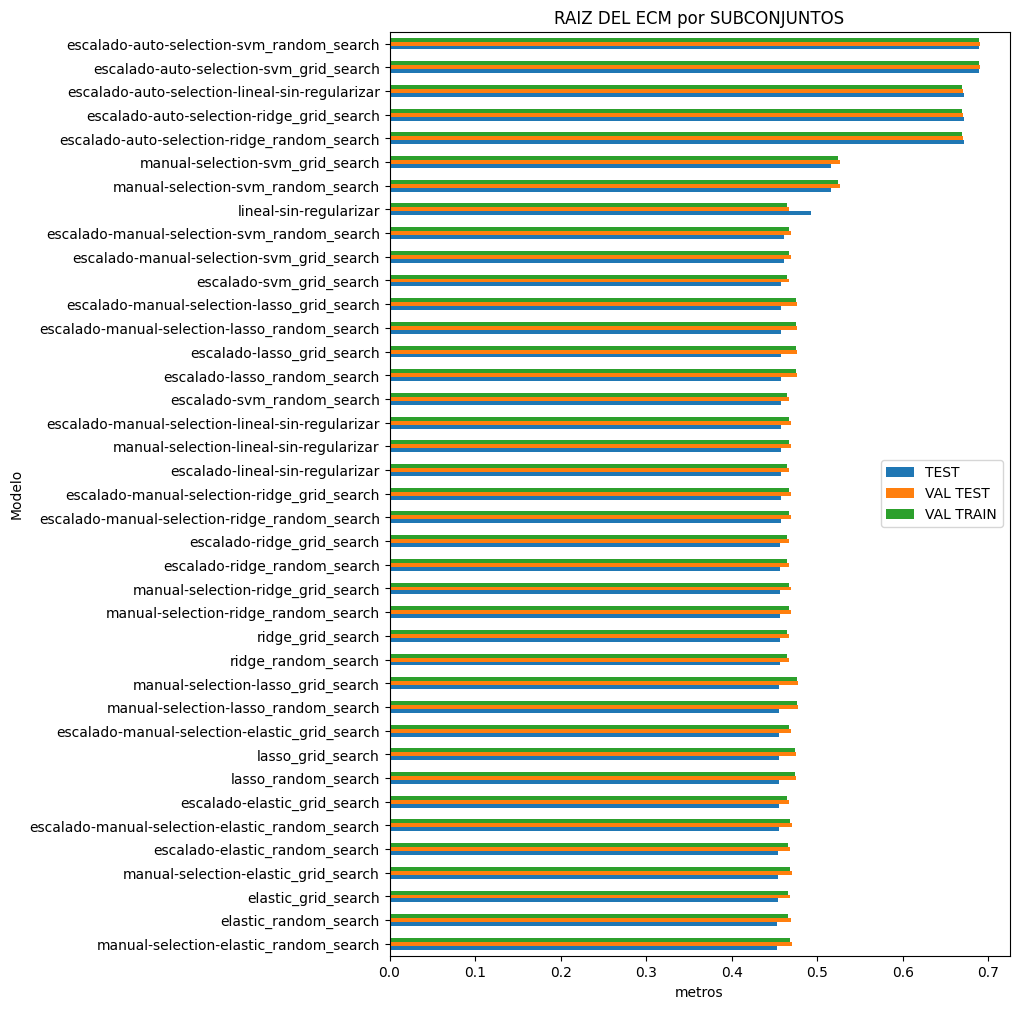

In [69]:
fig, ax = plt.subplots(figsize=(8,12))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='center right')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

Viendo esta gráfica podemos apreciar que el error sobre test suele ser más bajo o muy parecido con los errores de validación. La excepción está en el modelo de regresión sin regularizar, en el cual el error de test es mayor que los errores de validación, indicando que este modelo se podría descartar

Entre los conjuntos de validación, podemos afirmar que son muy parecidos en todos los modelos

### Otras métricas sobre el conjunto TEST

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros')

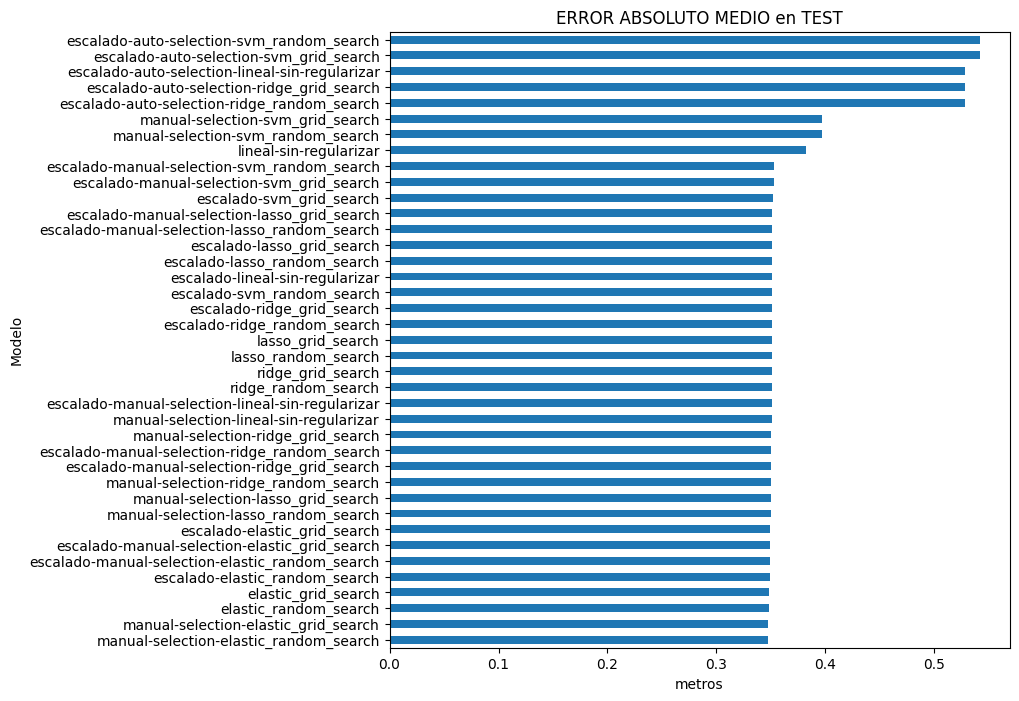

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En este caso vemos que varía bastante el rango de este error con respecto a la raiz de ECM, es menor (hasta 0,5 en vez de 0,7 para raiz de ECM)

#### Mediana del error absoluto

En vez de usar la media, usamos la mediana para que no afecten tanto los errores extremos

Text(0.5, 0, 'metros')

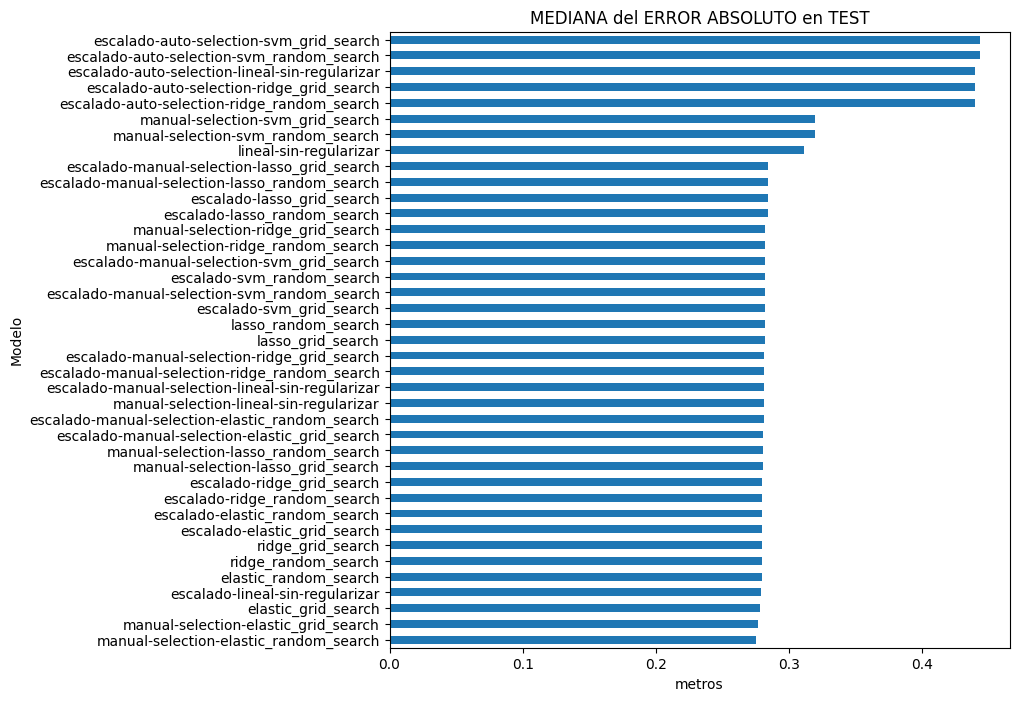

In [64]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEDIAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En este caso también el rango baja respecto la anterior gráfica (hasta 0,4, no hasta 0,5 como en la anterior). Esto es lógico, pues en el anterior gráfico al coger la media se ve afectada por valores más extremos.

#### Error máximo

Métrica importante y nos ayudará a tener en cuenta que modelos pueden funcionar mejor para predecir alturas de olas de todos los rangos

Text(0.5, 0, 'metros')

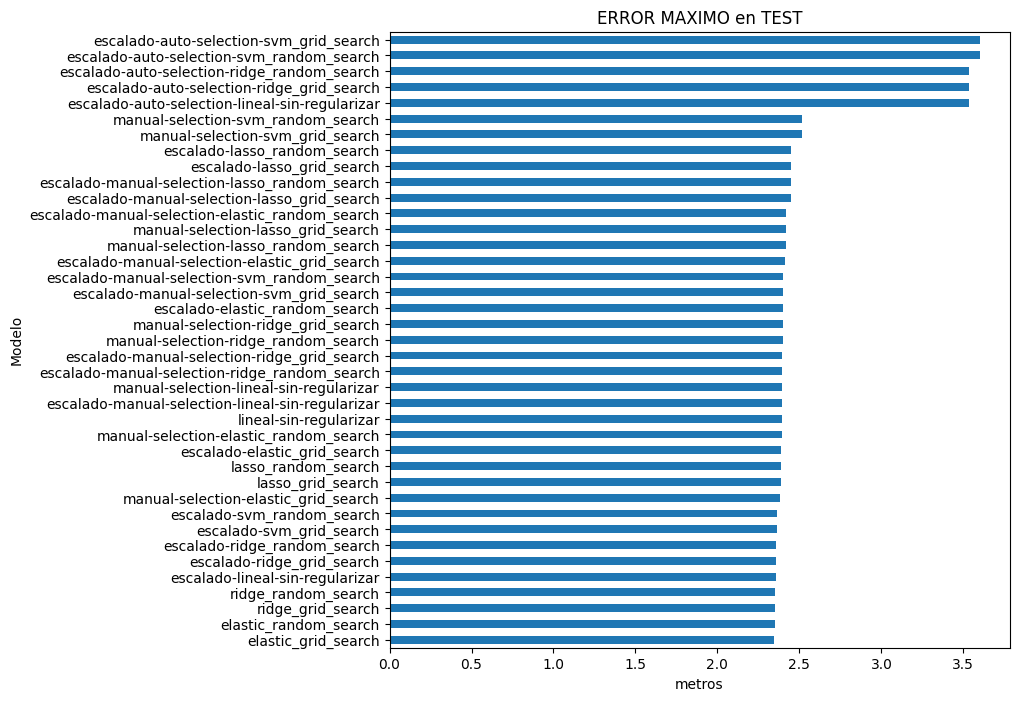

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MAX_ERROR')

runs.plot(x = 'Name', y = ['TEST_MAX_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR MAXIMO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Para comparar mejor los modelos nos vamos a quedar con los 5 mejores modelos de cada métrica y vamos a compararlos netre ellos para todas las métricas anteriores

In [106]:

metrics = ['TEST_ROOT_MEAN_SQ_ERROR', 'TEST_MEAN_ABS_ERROR', 'TEST_MEDIAN_ABS_ERROR', 'TEST_MAX_ERROR']
best_models = set() # para que no se repitan
for metric in metrics:
    runs = runs.sort_values(by=metric)
    for name in runs.head(5).Name:
        best_models.add(name)

In [107]:
best_models

{'elastic_grid_search',
 'elastic_random_search',
 'escalado-elastic_random_search',
 'escalado-lineal-sin-regularizar',
 'manual-selection-elastic_grid_search',
 'manual-selection-elastic_random_search',
 'ridge_grid_search',
 'ridge_random_search'}

In [130]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', 'red', '#D17A17', '#D62D2D']
dictCol = dict(zip(best_models, colors))

In [131]:
df = runs[runs.Name.isin(best_models)]
df['color'] = runs.Name.map(dictCol)

/var/folders/d9/w858q_3s5xj1lvw2flnmb_jr0000gn/T/ipykernel_11754/1793533541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = runs.Name.map(dictCol)


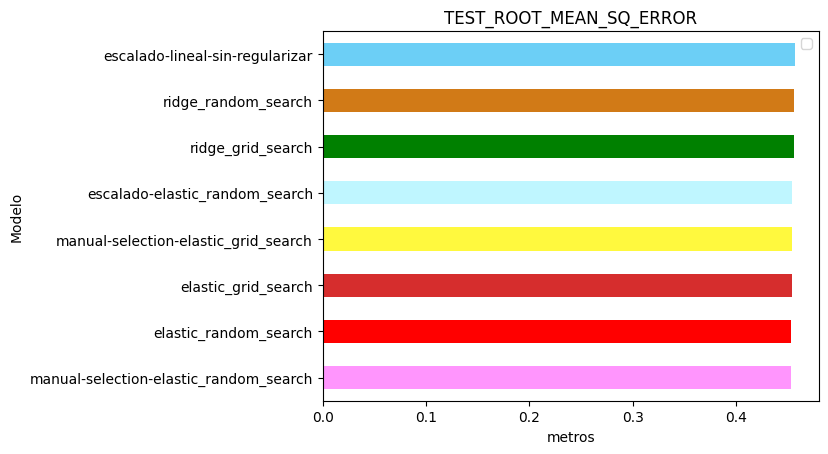

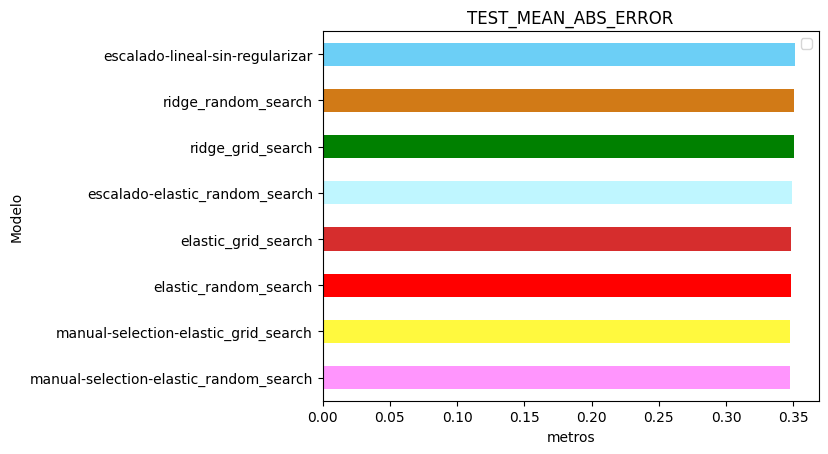

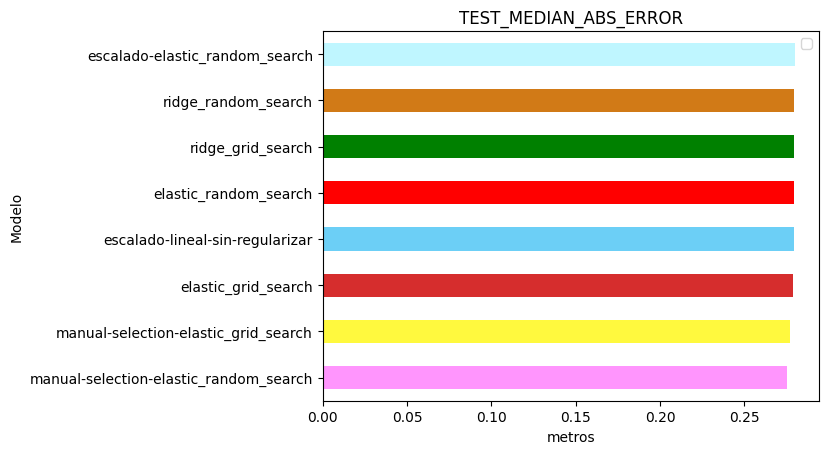

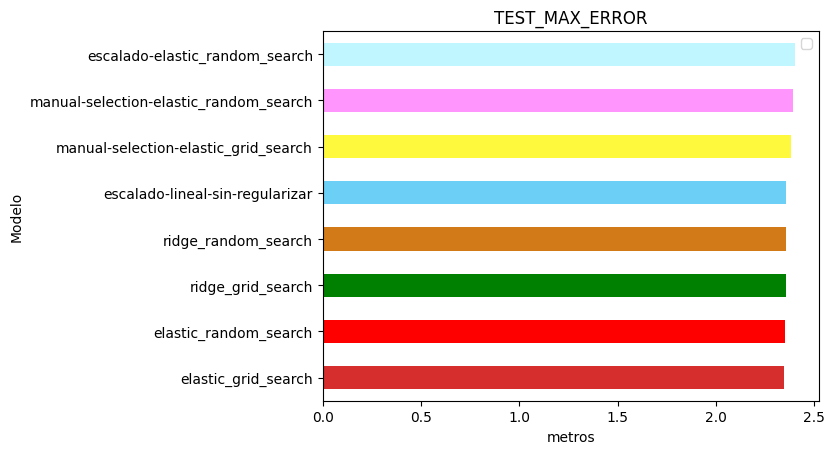

In [142]:
for metric in metrics:
    df = df.sort_values(by=metric) # ordenamos por nombre para que aparezcan en el mismo orden
    
    
    df.plot(x = 'Name', y = metric, kind='barh', color=df.color)
    plt.legend([])
    plt.title(metric)
    plt.ylabel('Modelo')
    plt.xlabel('metros')

Vemos que el modelo `manual-selection-elastic_random_search` es lider en tres métricas, excepto la de ERROR_MAXIMO, pero como la diferencia de error máximo con el mejor modelo es muy pequeña, podemos despreciarlo.

### Conclusión

Tras el analisis detallado de las métricas y comparaciones entre varios modelos hemos decidio quedarnos con el modelo `manual-selection-elastic_random_search`, es decir, el modelo de penalización Elastic Net con selección manual de variables.